In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('Health_Cost_main.csv')

In [3]:
df.head()

,Customer ID,year,month,day,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,birthdate,Age,gender
0,Id2335,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",1992-07-09,30.0,Male
1,Id2334,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",1992-11-30,30.0,Male
2,Id2333,1993,6,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",1993-06-30,29.0,Female
3,Id2332,1992,9,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",1992-09-13,30.0,Male
4,Id2331,1998,7,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",1998-07-27,24.0,Male


In [4]:
df.columns

Index(['Customer ID', 'year', 'month', 'day', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name', 'birthdate', 'Age',
       'gender'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   int64  
 2   month                   2325 non-null   int64  
 3   day                     2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   object 
 7   City tier               2325 non-null   object 
 8   State ID                2325 non-null   object 
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   object 
 12  Any Transplants         2325 non-null   object 
 13  Cancer history          2325 non-null   object 
 14  NumberOfMajorSurgeries  2325 non-null   

In [6]:
df = df.drop(columns=['Customer ID','name'])

In [7]:
df.head()

,year,month,day,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,birthdate,Age,gender
0,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,1992-07-09,30.0,Male
1,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,1992-11-30,30.0,Male
2,1993,6,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,1993-06-30,29.0,Female
3,1992,9,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,1992-09-13,30.0,Male
4,1998,7,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,1998-07-27,24.0,Male


# <mark>Droppping irrelevant columns and transformations</mark>

In [8]:
df['State ID'].unique()

array(['R1013', 'R1012', 'R1011', 'R1015', 'R1019', 'R1016', 'R1018',
       'R1025', 'R1024', 'R1023', 'R1014', 'R1021', 'R1017', 'R1020',
       'R1026', 'R1022'], dtype=object)

Text(0.5, 1.0, 'Count of State ID catgeories')

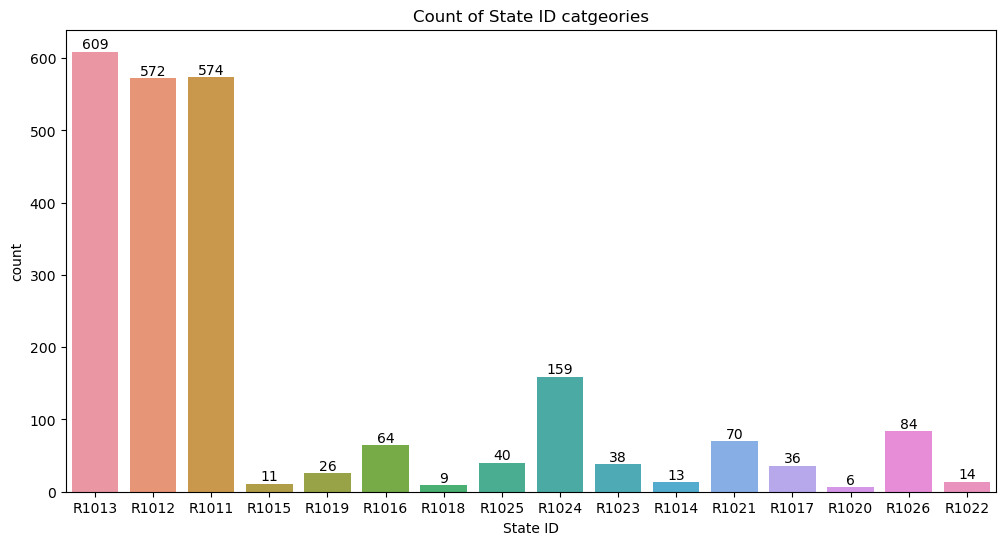

In [9]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data= df,x='State ID')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Count of State ID catgeories")

### The dataset has State ID, which has around 16 states.
### All states are not represented in equal proportions in the data. 
### Creating dummy variables for all regions may also result in too many insignificant predictors. 
### Nevertheless, only R1011, R1012, and R1013 are worth investigating further.

In [10]:
counts = df['State ID'].value_counts()

In [11]:
df['State ID'].nunique()
threshold = 500

In [12]:
repl = counts[counts<=threshold].index

In [13]:
state_df = pd.get_dummies(df['State ID'].replace(repl,'Other State ID'))

In [14]:
df = df.drop(columns=['State ID'])

In [15]:
df = pd.concat([df.reset_index(drop=True),state_df.reset_index(drop=True)],axis=1)

In [16]:
df.head()

,year,month,day,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,...,Cancer history,NumberOfMajorSurgeries,smoker,birthdate,Age,gender,Other State ID,R1011,R1012,R1013
0,1992,7,9,0,563.84,tier - 2,tier - 3,17.58,4.51,No,...,No,1,No,1992-07-09,30.0,Male,0,0,0,1
1,1992,11,30,0,570.62,tier - 2,tier - 1,17.60,4.39,No,...,No,1,No,1992-11-30,30.0,Male,0,0,0,1
2,1993,6,30,0,600.00,tier - 2,tier - 1,16.47,6.35,No,...,Yes,1,No,1993-06-30,29.0,Female,0,0,0,1
3,1992,9,13,0,604.54,tier - 3,tier - 3,17.70,6.28,No,...,No,1,No,1992-09-13,30.0,Male,0,0,0,1
4,1998,7,27,0,637.26,tier - 3,tier - 3,22.34,5.57,No,...,No,1,No,1998-07-27,24.0,Male,0,0,0,1


Text(0.5, 1.0, 'Correlation Factors Heat Map')

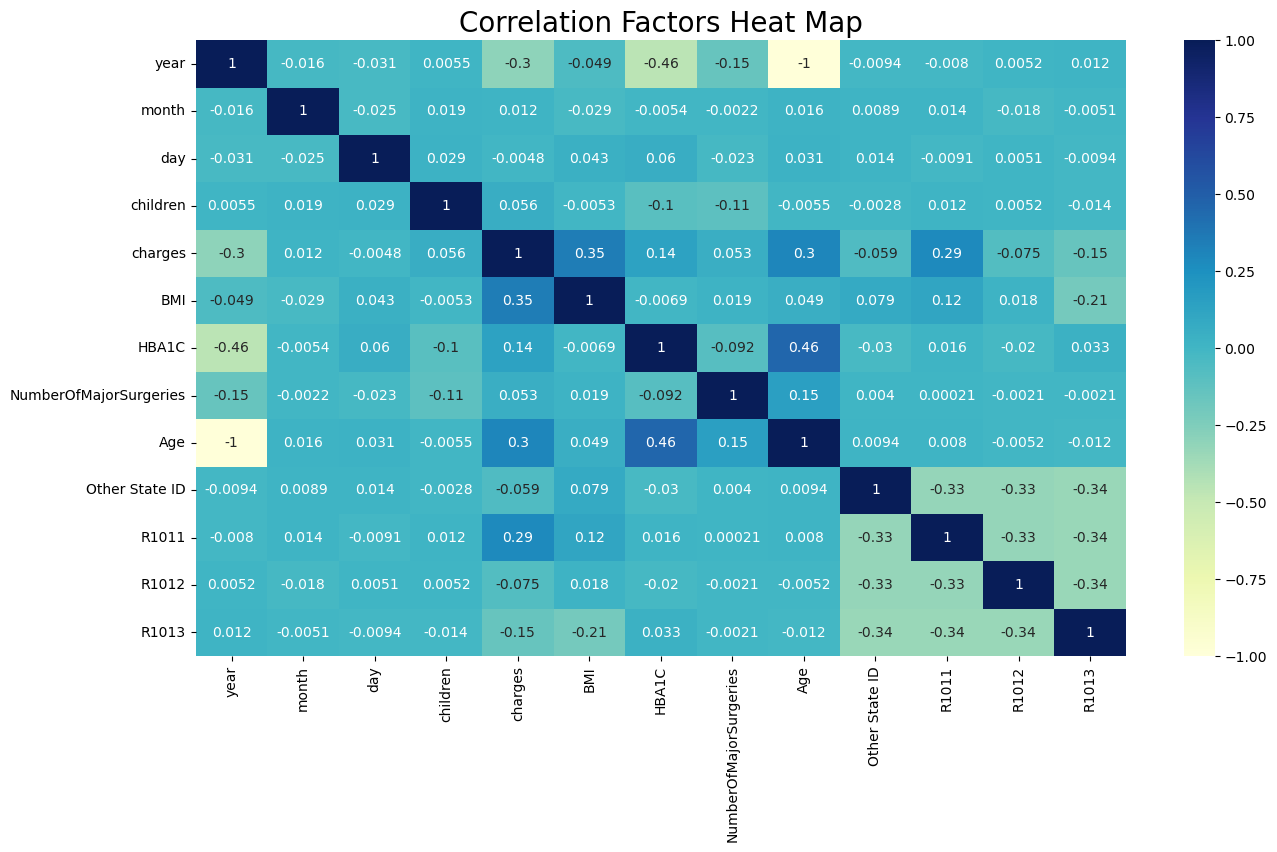

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

## Dropping year, month, day and birthdate columns as we have  age column in our dataset

In [18]:
df = df.drop(columns=['year','month','day','birthdate'])
df.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,gender,Other State ID,R1011,R1012,R1013
0,0,563.84,tier - 2,tier - 3,17.58,4.51,No,No,No,1,No,30.0,Male,0,0,0,1
1,0,570.62,tier - 2,tier - 1,17.60,4.39,No,No,No,1,No,30.0,Male,0,0,0,1
2,0,600.00,tier - 2,tier - 1,16.47,6.35,No,No,Yes,1,No,29.0,Female,0,0,0,1
3,0,604.54,tier - 3,tier - 3,17.70,6.28,No,No,No,1,No,30.0,Male,0,0,0,1
4,0,637.26,tier - 3,tier - 3,22.34,5.57,No,No,No,1,No,24.0,Male,0,0,0,1


In [19]:
df['Hospital tier'] = df['Hospital tier'].replace(['tier - 3', 'tier - 2', 'tier - 1'], [1, 2, 3])
df['City tier'] = df['City tier'].replace(['tier - 3', 'tier - 2', 'tier - 1'], [1, 2, 3])

In [20]:
df.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,gender,Other State ID,R1011,R1012,R1013
0,0,563.84,2,1,17.58,4.51,No,No,No,1,No,30.0,Male,0,0,0,1
1,0,570.62,2,3,17.60,4.39,No,No,No,1,No,30.0,Male,0,0,0,1
2,0,600.00,2,3,16.47,6.35,No,No,Yes,1,No,29.0,Female,0,0,0,1
3,0,604.54,1,1,17.70,6.28,No,No,No,1,No,30.0,Male,0,0,0,1
4,0,637.26,1,1,22.34,5.57,No,No,No,1,No,24.0,Male,0,0,0,1


In [21]:
bianry_cols =  ['Heart Issues','Any Transplants','Cancer history','smoker','gender']

In [22]:
ohe = OneHotEncoder(sparse=False,drop='first')

In [23]:
new_df = ohe.fit_transform(df[bianry_cols])

In [24]:
new_df = pd.DataFrame(new_df,columns=bianry_cols)
new_df

,Heart Issues,Any Transplants,Cancer history,smoker,gender
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
2320,0.0,0.0,0.0,1.0,1.0
2321,0.0,0.0,0.0,1.0,0.0
2322,0.0,0.0,0.0,1.0,0.0
2323,0.0,0.0,0.0,1.0,1.0


In [25]:
df = df.drop(columns=bianry_cols)

In [26]:
df = pd.concat([df.reset_index(drop=True),new_df.reset_index(drop=True)],axis=1)

In [27]:
df

,children,charges,Hospital tier,City tier,BMI,HBA1C,NumberOfMajorSurgeries,Age,Other State ID,R1011,R1012,R1013,Heart Issues,Any Transplants,Cancer history,smoker,gender
0,0,563.84,2,1,17.580,4.51,1,30.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
1,0,570.62,2,3,17.600,4.39,1,30.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
2,0,600.00,2,3,16.470,6.35,1,29.0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
3,0,604.54,1,1,17.700,6.28,1,30.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
4,0,637.26,1,1,22.340,5.57,1,24.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,0,52590.83,3,1,32.800,6.59,0,60.0,0,1,0,0,0.0,0.0,0.0,1.0,1.0
2321,0,55135.40,3,2,35.530,5.45,0,33.0,0,0,1,0,0.0,0.0,0.0,1.0,0.0
2322,1,58571.07,3,1,38.095,6.05,0,31.0,1,0,0,0,0.0,0.0,0.0,1.0,0.0
2323,0,62592.87,2,1,30.360,5.77,0,45.0,0,0,0,1,0.0,0.0,0.0,1.0,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                2325 non-null   int64  
 1   charges                 2325 non-null   float64
 2   Hospital tier           2325 non-null   int64  
 3   City tier               2325 non-null   int64  
 4   BMI                     2325 non-null   float64
 5   HBA1C                   2325 non-null   float64
 6   NumberOfMajorSurgeries  2325 non-null   int64  
 7   Age                     2325 non-null   float64
 8   Other State ID          2325 non-null   uint8  
 9   R1011                   2325 non-null   uint8  
 10  R1012                   2325 non-null   uint8  
 11  R1013                   2325 non-null   uint8  
 12  Heart Issues            2325 non-null   float64
 13  Any Transplants         2325 non-null   float64
 14  Cancer history          2325 non-null   

In [29]:
df

,children,charges,Hospital tier,City tier,BMI,HBA1C,NumberOfMajorSurgeries,Age,Other State ID,R1011,R1012,R1013,Heart Issues,Any Transplants,Cancer history,smoker,gender
0,0,563.84,2,1,17.580,4.51,1,30.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
1,0,570.62,2,3,17.600,4.39,1,30.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
2,0,600.00,2,3,16.470,6.35,1,29.0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
3,0,604.54,1,1,17.700,6.28,1,30.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
4,0,637.26,1,1,22.340,5.57,1,24.0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,0,52590.83,3,1,32.800,6.59,0,60.0,0,1,0,0,0.0,0.0,0.0,1.0,1.0
2321,0,55135.40,3,2,35.530,5.45,0,33.0,0,0,1,0,0.0,0.0,0.0,1.0,0.0
2322,1,58571.07,3,1,38.095,6.05,0,31.0,1,0,0,0,0.0,0.0,0.0,1.0,0.0
2323,0,62592.87,2,1,30.360,5.77,0,45.0,0,0,0,1,0.0,0.0,0.0,1.0,1.0


# Base model:

In [30]:
X = df.drop(columns='charges')
Y = df['charges']

In [31]:
x_train,x_test,y_train,y_test = split(X,Y,random_state=100,test_size=0.2)

In [32]:
RF = RandomForestRegressor()

In [33]:
cv= KFold(n_splits=6,random_state=10,shuffle=True)
cv_results = cross_val_score(RF,x_train,y_train,cv =cv,scoring='r2')

In [34]:
print(f"RF r2_score: {round(cv_results.mean(),2)}")

RF r2_score: 0.91


In [35]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred = RF.predict(x_test)

In [37]:
x_train.shape

(1860, 16)

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1-((1-r2)*(1860-1))/(1860-16-1)

In [39]:
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)
print("Adjusted_r2: ",adjusted_r2)

MSE:  11719439.37870559
RMSE:  3423.3666731312305
MAE:  1843.6678640860218
R2:  0.9188003739462995
Adjusted_r2:  0.9180954395909772


# Hyperparameter tuning:

In [43]:
param_grid = {'n_estimators':[20,60,100,120],
          'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
          'max_depth':[2,5,8,10,None],
          'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [44]:
rf_grid = GridSearchCV(estimator=RF,
                      param_grid=param_grid,
                      verbose=0,
                      n_jobs=-1,
                      cv=4)

In [45]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 5, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 60, 100, 120]})

In [46]:
rf_grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 60}

In [47]:
rf_grid.best_score_

0.9124174771250405

In [48]:
rf_tuned =RandomForestRegressor(criterion='absolute_error',max_depth=10,min_samples_leaf=2,min_samples_split=5,n_estimators=60)

In [49]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=2, min_samples_split=5, n_estimators=60)

In [51]:
rf_tuned_predict=rf_tuned.predict(x_test)

In [52]:
mse = mean_squared_error(y_test,rf_tuned_predict)
rmse = mean_squared_error(y_test,rf_tuned_predict, squared=False)
mae = mean_absolute_error(y_test,rf_tuned_predict )
r2_ = r2_score(y_test, y_pred)
adjusted_r2 = 1-((1-r2_)*(1860-1))/(1860-16-1)

In [53]:
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2_)
print("Adjusted_r2: ",adjusted_r2)

MSE:  10724729.798606459
RMSE:  3274.863325179611
MAE:  1684.0832611111114
R2:  0.9188003739462995
Adjusted_r2:  0.9180954395909772


## <mark>*Case scenario*</mark>: <font color ='red'>Estimate the cost of hospitalization for Christopher, Ms. Jayna(her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier 1 city and her state’s State ID is R1011. She lives with herpartner and two children. She was found to be nondiabetic (HbA1c = 5.8). Shesmokes but is otherwise healthy. She has had no transplants or major surgeries.Her father died of lung cancer. Hospitalization costs will be estimated using tier 1 hospitals.</font>


In [70]:
from dateutil.relativedelta import relativedelta

In [54]:
date = str(19881228)
date1 = pd.to_datetime(date, format = "%Y%m%d")

In [55]:
today = pd.to_datetime('today')

In [58]:
today

Timestamp('2023-02-22 22:37:44.261439')

In [71]:
age =  relativedelta(today, date1).years
age

34

In [72]:
# now with the help of height and weight we will calculate the BMI.
height_m = 170/100
height_sq = height_m*height_m
BMI = 85/height_sq
np.round(BMI,2)

29.41

In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 1212 to 1544
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                1860 non-null   int64  
 1   Hospital tier           1860 non-null   int64  
 2   City tier               1860 non-null   int64  
 3   BMI                     1860 non-null   float64
 4   HBA1C                   1860 non-null   float64
 5   NumberOfMajorSurgeries  1860 non-null   int64  
 6   Age                     1860 non-null   float64
 7   Other State ID          1860 non-null   uint8  
 8   R1011                   1860 non-null   uint8  
 9   R1012                   1860 non-null   uint8  
 10  R1013                   1860 non-null   uint8  
 11  Heart Issues            1860 non-null   float64
 12  Any Transplants         1860 non-null   float64
 13  Cancer history          1860 non-null   float64
 14  smoker                  1860 non-null

In [ ]:
list = [[2,3,3,29.41,5.8,0,34,0,1,0,0,0,0,1,1,0]]

In [84]:
df_new = pd.DataFrame(list, columns = ['children', 'Hospital tier', 'City tier'
,'BMI', 'HBA1C','NumberOfMajorSurgeries','Age','Other State ID','R1011','R1012','R1013','Heart Issues', 'Any Transplants',
'Cancer history','smoker', 'gender'] )
df_new

,children,Hospital tier,City tier,BMI,HBA1C,NumberOfMajorSurgeries,Age,Other State ID,R1011,R1012,R1013,Heart Issues,Any Transplants,Cancer history,smoker,gender
0,2,3,3,29.41,5.8,0,34,0,1,0,0,0,0,1,1,0


In [93]:
print(f"Cost:{rf_tuned.predict(df_new)}")

Cost:[26848.35216667]
